# Fractales

In [139]:
# import useful python packages
import numpy as np # for vector and matrix manipulations
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting nicer

sb.set_theme(context="notebook", style="ticks")

## Générer fractales classiques

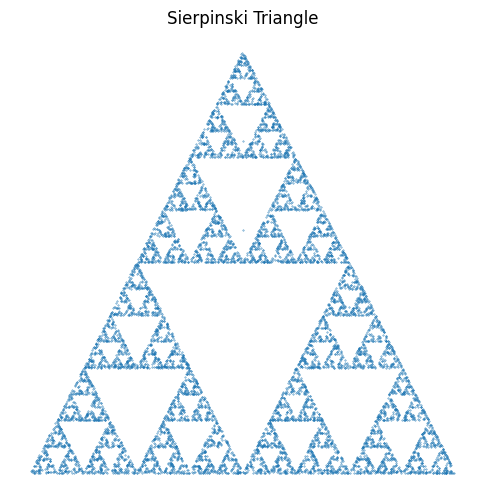

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Sierpinski triangle
def sierpinski_triangle(n_iter=5):
    points = [(0, 0), (1, 0), (0.5, np.sqrt(3)/2)]
    x, y = [0.5], [0.5]
    for _ in range(n_iter):
        idx = np.random.randint(0, 3)
        x.append((x[-1] + points[idx][0]) / 2)
        y.append((y[-1] + points[idx][1]) / 2)
    return x, y

x, y = sierpinski_triangle(10000)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=0.1)
plt.title("Sierpinski Triangle")
plt.axis("off")
plt.show()

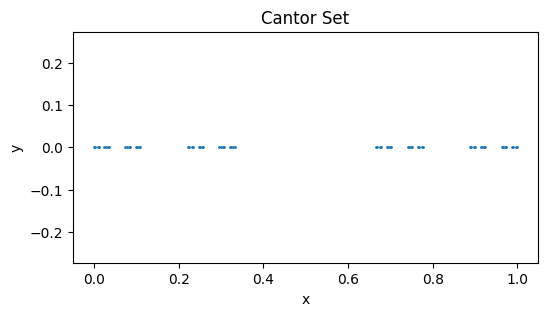

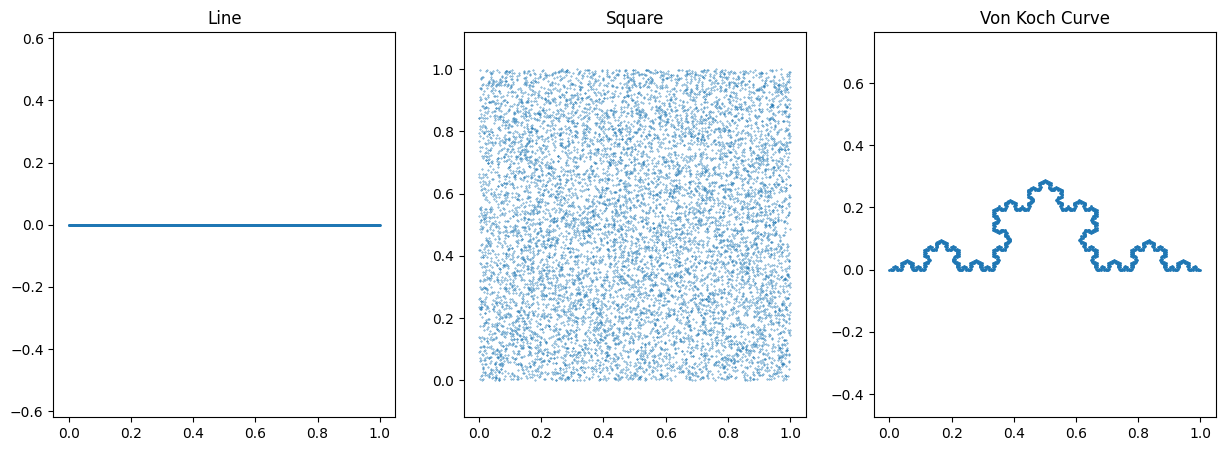

In [5]:

# Generate points for a straight line
def generate_line():
    x = np.linspace(0, 1, 1000)
    y = np.zeros_like(x)
    return x, y

# Generate points for a square (filled)
def generate_square():
    x = np.random.rand(10000)
    y = np.random.rand(10000)
    return x, y

# Generate points for the von Koch curve
def von_koch_curve(iterations):
    points = np.array([[0, 0], [1, 0]])
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i + 1]
            dx, dy = p2 - p1
            new_points.append(p1)
            new_points.append(p1 + [dx / 3, dy / 3])
            new_points.append(p1 + [dx / 2 - np.sqrt(3) * dy / 6, dy / 2 + np.sqrt(3) * dx / 6])
            new_points.append(p1 + [2 * dx / 3, 2 * dy / 3])
        new_points.append(points[-1])
        points = np.array(new_points)
    return points[:, 0], points[:, 1]

# Generate the Cantor set points
def cantor_set(iterations):
    segments = [0, 1]  # Start with the interval [0, 1]
    for _ in range(iterations):
        new_segments = []
        for i in range(0, len(segments) - 1, 2):
            a, b = segments[i], segments[i + 1]
            new_segments.extend([a, (2 * a + b) / 3, (a + 2 * b) / 3, b])
        segments = new_segments
    x = segments[::2]  # Start of each segment
    y = np.zeros_like(x)  # y-coordinates for visualization
    return np.array(x), np.array(y)

# Generate the Cantor set
x_cantor, y_cantor = cantor_set(6)

# Visualize the Cantor set
plt.figure(figsize=(6, 3))
plt.scatter(x_cantor, y_cantor, s=1)
plt.title("Cantor Set")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


# Generate the datasets
x_line, y_line = generate_line()
x_square, y_square = generate_square()
x_koch, y_koch = von_koch_curve(5)

# Visualize the shapes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(x_line, y_line, s=1)
axs[0].set_title("Line")
axs[1].scatter(x_square, y_square, s=0.1)
axs[1].set_title("Square")
axs[2].scatter(x_koch, y_koch, s=1)
axs[2].set_title("Von Koch Curve")
for ax in axs:
    ax.axis("equal")
plt.show()


## Exemple simple d'attracteur étrange

In [13]:
def henon_map(x, a=1.4, b=0.3):
    a, b = map_params
    x_new = 1 - a * x[0] ** 2 + x[1]
    y_new = b * x[0]
    return np.array([x_new, y_new])

def integrate(f, x0, n_times, map_params=()):
    solution = np.zeros((n_times + 1, len(x0)))
    solution[0] = x0
    for it in range(1, n_times + 1):
        solution[it] = f(solution[it - 1], *map_params)
    return solution

In [42]:
# Parameters
x0 = [0.9, 0.2]

n_times = 10000
map_params = (1.4, 0.3)

# integrate the system
solution = integrate(henon_map, x0, n_times, map_params)

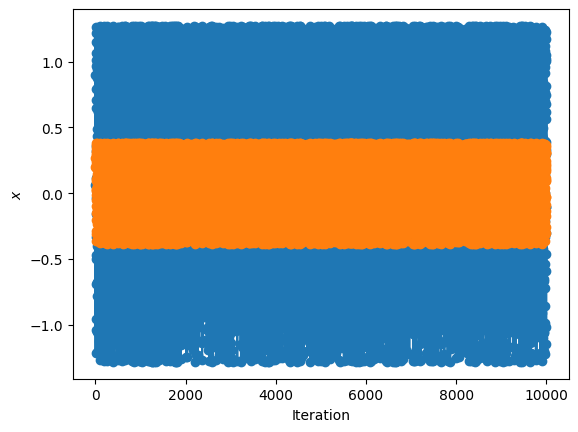

In [43]:
# Visualization
fig, ax = plt.subplots()

ax.plot(range(n_times+1), solution, "o-")
ax.set_xlabel("Iteration")
ax.set_ylabel("$x$")

plt.show()

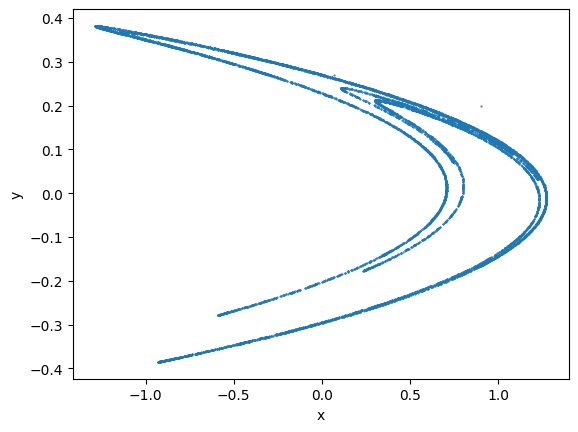

In [45]:
fig, ax = plt.subplots()

ax.plot(solution[:,0], solution[:,1], "o", ms=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()